# **Homework 18: Deep Learning with CNNs**
---

### **Description**
In this notebook you'll work through another application of image classification using Convolutional Neural Networks (CNNs). You will build a CNN model using the steps of implementing a neural net with keras.

<br>

### **Structure**

**Part 1**: [CIFAR-100 General Image Classifiction](#p1)


<br>


### **Goals**
By the end of this notebook, you will be able to:
* Build and train a CNN using keras.

<br>

### **Cheat Sheets**
* [CNNS with keras](https://docs.google.com/document/d/1dWzbeOptutEQ3N1_kJi5uOWthrNkNa9JcrWoQ_DsABc/edit?usp=sharing)

* [Deep Learning with keras](https://docs.google.com/document/d/1WCV2ok7dwPWCid5vdOImknCAJS2te5aQ8yRp6J5Clac/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
!pip install --quiet gdown==4.5.4 --no-cache-dir
import os
import random
from PIL import Image as PILImage
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from math import floor

import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras import backend as K
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.metrics import *
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical
from keras.datasets import cifar100

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

<a name="p1"></a>

---
## **Part 1: CIFAR-100 Classifiction**
---

You will make a neural network that classifies images from the CIFAR-100 dataset. This dataset contains 60,000 images each of 32x32 RGB color images that belong to 1 out of 100 possible classes:

<br>

1-5) beaver, dolphin, otter, seal, whale

6-10) aquarium fish, flatfish, ray, shark, trout

11-15) orchids, poppies, roses, sunflowers, tulips

16-20) bottles, bowls, cans, cups, plates

21-25) apples, mushrooms, oranges, pears, sweet peppers

26-30) clock, computer keyboard, lamp, telephone, television

31-35) bed, chair, couch, table, wardrobe

36-40) bee, beetle, butterfly, caterpillar, cockroach

41-45) bear, leopard, lion, tiger, wolf

46-50) bridge, castle, house, road, skyscraper

51-55) cloud, forest, mountain, plain, sea

56-60) camel, cattle, chimpanzee, elephant, kangaroo

61-65) fox, porcupine, possum, raccoon, skunk

66-70) crab, lobster, snail, spider, worm

71-75) baby, boy, girl, man, woman

76-80) crocodile, dinosaur, lizard, snake, turtle

81-85) hamster, mouse, rabbit, shrew, squirrel

86-90) maple, oak, palm, pine, willow

91-95) bicycle, bus, motorcycle, pickup truck, train

96-100) lawn-mower, rocket, streetcar, tank, tractor

<br>

and the list of the 20 superclasses:

1) aquatic mammals (classes 1-5)

2) fish (classes 6-10)

3) flowers (classes 11-15)

4) food containers (classes 16-20)

5) fruit and vegetables (classes 21-25)

6) household electrical devices (classes 26-30)

7) household furniture (classes 31-35)

8) insects (classes 36-40)

9) large carnivores (classes 41-45)

10) large man-made outdoor things (classes 46-50)

11) large natural outdoor scenes (classes 51-55)

12) large omnivores and herbivores (classes 56-60)

13) medium-sized mammals (classes 61-65)

14) non-insect invertebrates (classes 66-70)

15) people (classes 71-75)

16) reptiles (classes 76-80)

17) small mammals (classes 81-85)

18) trees (classes 86-90)

19) vehicles 1 (classes 91-95)

20) vehicles 2 (classes 96-100)


### **Step #1: Load the data.**

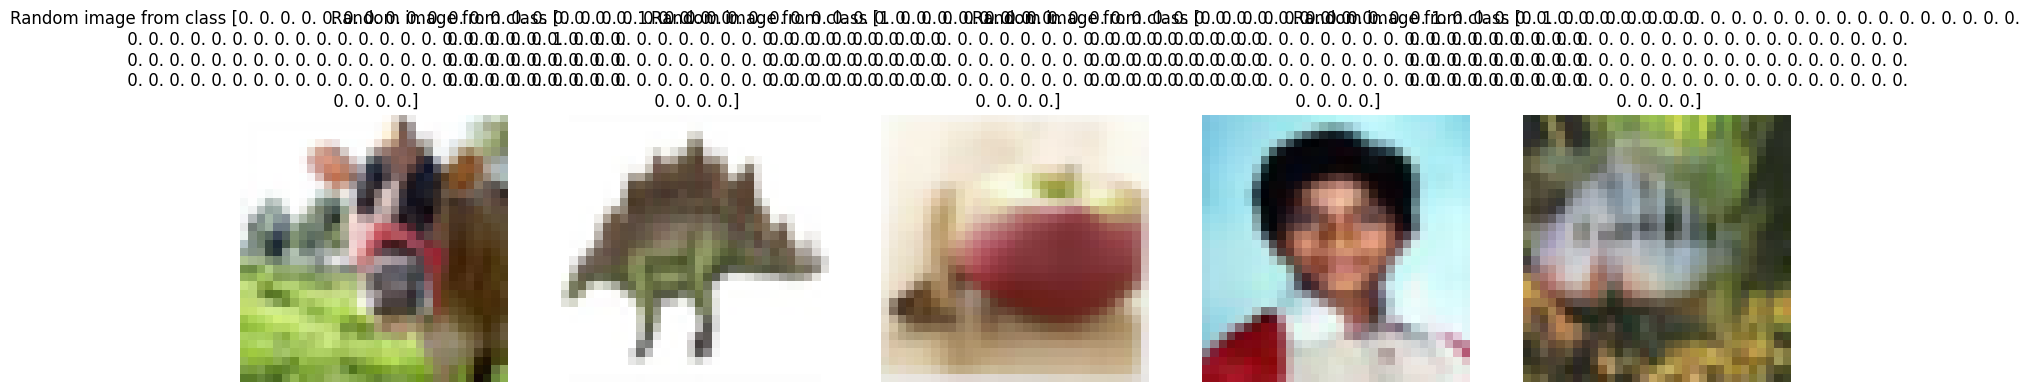

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

plt.figure(figsize=(20,5))

# Show a few images from the dataset
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

### **Step #2: Determine the dimensions of the data.**

Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network.



### **Steps #3 - 6: Build the sequential model.**

Now let's build and fit a Neural Network to classify these images. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Visualize the training and validation performance per epoch.



#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* 3 hidden layers with 512, 256, and 256 neurons, respectively. Build all hidden layers with relu activation.
* 100 output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class.**

<br>

Train the NN such that the:
* `loss = 'categorical_crossentropy'`.
* `metrics = ['accuracy']`.


In [ ]:
model_nn = # COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(# COMPLETE THIS LINE

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

#### **2. Visualize the training and validation performance per epoch.**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

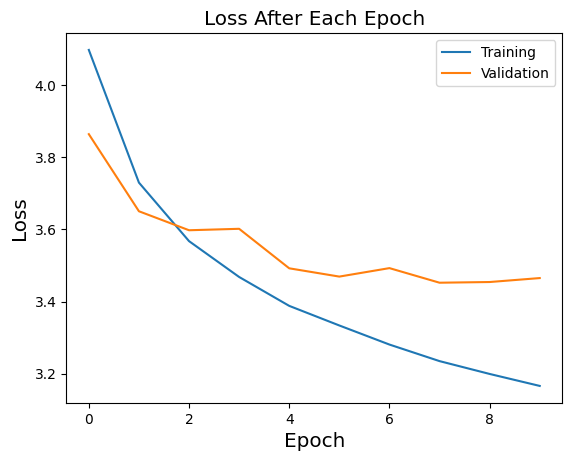

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

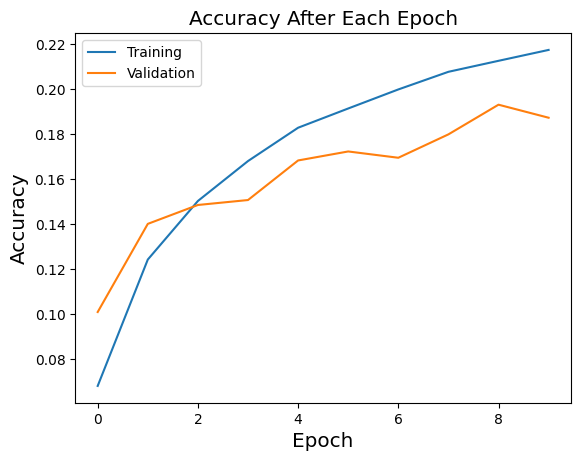

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step


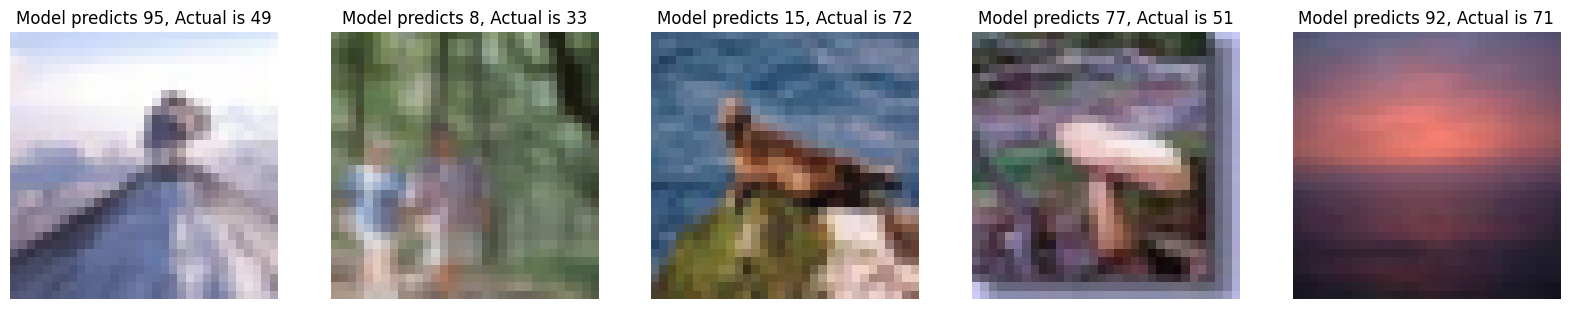

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]


# Plot images with predicted labels
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

# End of notebook
---
© 2024 The Coding School, All rights reserved